## Data Loading and Clearing

In [1]:
import pandas as pd
import numpy as np

games = pd.read_csv('data/games.csv')
users = pd.read_csv('data/users.csv')
recommendations = pd.read_csv('data/recommendations.csv')

In [2]:
print("Games:\n", games.head(), "\n")
print("Users:\n", users.head(), "\n")
print("Recommendations:\n", recommendations.head(), "\n")

Games:
    app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS™   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1       Positive              85            21         2.99            2.99   
2  Very Positive              92          3722        14.99           14.99   
3          Mixed              61           873        14.99           14.99   
4  Very Positive              88          8784        11.99           11.99   

   discount  steam_deck  
0   

In [3]:
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB
None


In [4]:
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306064 entries, 0 to 14306063
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   products  int64
 2   reviews   int64
dtypes: int64(3)
memory usage: 327.4 MB
None


In [5]:
print(recommendations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 2.2+ GB
None


Instead of processing the entire dataset, we select a small, representative portion of the data for all subsequent operations.


In [10]:
# Select the top 500 most-reviewed games
selected_games = games.sort_values('user_reviews', ascending=False).head(500)

# Save the filtered games to ensure consistency
selected_games.to_csv('data/selected_games.csv', index=False)
print(f"Selected Games: {selected_games.shape}")

Selected Games: (500, 13)


In [13]:
# Select users with at least 40 reviews
active_users = users[users['reviews'] >= 40]

# Save the filtered users for consistency
active_users.to_csv('data/selected_users.csv', index=False)
print(f"Highly Active Users: {active_users.shape}")

Highly Active Users: (57973, 3)


In [16]:
# Filter recommendations for selected games and active users
filtered_recommendations = recommendations[
    (recommendations['app_id'].isin(selected_games['app_id'])) &
    (recommendations['user_id'].isin(active_users['user_id']))
]

print(f"Recommendations after filtering: {filtered_recommendations.shape}")

Recommendations after filtering: (1466223, 8)


In [19]:
# Randomly sample 15% of the filtered recommendations
sampled_recommendations = filtered_recommendations.sample(frac=0.15, random_state=42)

# Save the sampled recommendations
sampled_recommendations.to_csv('data/sampled_recommendations.csv', index=False)
print(f"Sampled Recommendations: {sampled_recommendations.shape}")

Sampled Recommendations: (219933, 8)


In [25]:
# Merge 'date_release' into the final dataset
final_dataset = sampled_recommendations.merge(
    selected_games[['app_id', 'price_final', 'discount', 'positive_ratio', 'date_release']],
    on='app_id',
    how='left'
)

# Save the final dataset for reuse
final_dataset.to_csv('data/final_dataset.csv', index=False)
print(f"Final Dataset Size: {final_dataset.shape}")

Final Dataset Size: (219933, 12)


In [27]:
print(final_dataset.columns)

Index(['app_id', 'helpful', 'funny', 'date', 'is_recommended', 'hours',
       'user_id', 'review_id', 'price_final', 'discount', 'positive_ratio',
       'date_release'],
      dtype='object')


In [28]:
# Convert 'date_release' to datetime
final_dataset['date_release'] = pd.to_datetime(final_dataset['date_release'], errors='coerce')

# Find the earliest and latest release year
earliest_year = final_dataset['date_release'].dt.year.min()
latest_year = final_dataset['date_release'].dt.year.max()

print(f"Earliest Release Year: {earliest_year}")
print(f"Latest Release Year: {latest_year}")

Earliest Release Year: 1998
Latest Release Year: 2023


The revised dataset that I will be working with contains detailed information on 500 of the most-reviewed games available on the Steam platform. These games, released between 1998 and 2023, span a wide range of genres, platforms, and pricing models.

## Exploratory Data Analysis

In [29]:
# Load the new datasets
final_games = pd.read_csv('data/selected_games.csv')  # 500 most-reviewed games
final_users = pd.read_csv('data/selected_users.csv')  # Users with >= 40 reviews
final_recommendations = pd.read_csv('data/sampled_recommendations.csv')  # 15% sampled recommendations

In [31]:
print("### Final Games Dataset")
print("Columns:", final_games.columns.tolist())
print(final_games.head())


### Final Games Dataset
Columns: ['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating', 'positive_ratio', 'user_reviews', 'price_final', 'price_original', 'discount', 'steam_deck']
   app_id                             title date_release   win    mac  linux  \
0     730  Counter-Strike: Global Offensive   2012-08-21  True   True   True   
1  578080               PUBG: BATTLEGROUNDS   2017-12-21  True  False  False   
2     570                            Dota 2   2013-07-09  True   True   True   
3  271590                Grand Theft Auto V   2015-04-13  True  False  False   
4  359550   Tom Clancy's Rainbow Six® Siege   2015-12-01  True  False  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              88       7494460         15.0             0.0   
1          Mixed              57       2217226          0.0             0.0   
2  Very Positive              82       2045628          0.0             0.0   
3  Very 

In [32]:
print("\n### Final Users Dataset")
print("Columns:", final_users.columns.tolist())
print(final_users.head())


### Final Users Dataset
Columns: ['user_id', 'products', 'reviews']
    user_id  products  reviews
0  11316351       677       68
1   4363012      1001       72
2   4893896       496       50
3   6366584      1597      129
4  11140739       286       79


In [33]:
print("\n### Final Recommendations Dataset")
print("Columns:", final_recommendations.columns.tolist())
print(final_recommendations.head())


### Final Recommendations Dataset
Columns: ['app_id', 'helpful', 'funny', 'date', 'is_recommended', 'hours', 'user_id', 'review_id']
    app_id  helpful  funny        date  is_recommended  hours   user_id  \
0    55230        4      0  2016-11-23            True   42.5  11719461   
1   250900        2      0  2022-06-28            True   73.1   5995128   
2  1286830        2      2  2020-07-22           False  188.7  10213711   
3   377160        0      0  2017-05-26            True  264.8  14172991   
4   240720        0      0  2022-11-27            True   19.0  12274208   

   review_id  
0   22118917  
1    2195484  
2    2078355  
3    4796238  
4   17825487  


#### Descriptive Statistics

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
descriptive_stats = final_dataset[['price_final', 'discount', 'positive_ratio', 'hours']].describe()

print("### Descriptive Statistics")
print(descriptive_stats)

### Descriptive Statistics
         price_final       discount  positive_ratio          hours
count  219933.000000  219933.000000   219933.000000  219933.000000
mean       20.594121       3.154279       89.095111      76.823279
std        16.435132      15.314748        8.644655     140.955482
min         0.000000       0.000000       26.000000       0.000000
25%         7.990000       0.000000       86.000000       8.800000
50%        19.990000       0.000000       91.000000      24.800000
75%        30.000000       0.000000       95.000000      72.800000
max        70.000000      90.000000       98.000000     999.900000


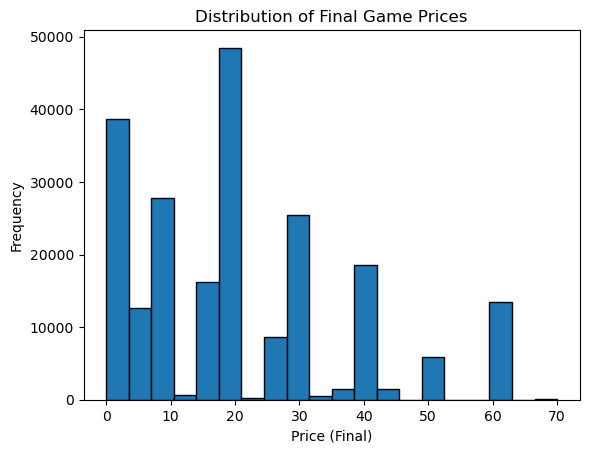

In [37]:
import matplotlib.pyplot as plt

plt.hist(final_dataset['price_final'], bins=20, edgecolor='black')
plt.title('Distribution of Final Game Prices')
plt.xlabel('Price (Final)')
plt.ylabel('Frequency')
plt.show()

#### Initial Visualizations

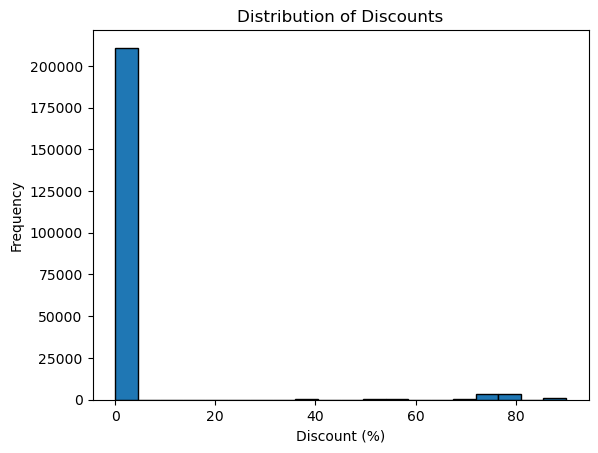

In [38]:
plt.hist(final_dataset['discount'], bins=20, edgecolor='black')
plt.title('Distribution of Discounts')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.show()

The distribution of game discounts reveals that the majority of games receive no discount (0%), reflecting a strategy to maintain their base price. Only a small subset of games features discounts, with sporadic occurrences beyond the 20% mark. A slight increase is observed near 80%, likely tied to promotional events or heavy price cuts during sales. This pattern highlights that deep discounts are uncommon for top-reviewed games, as developers likely aim to preserve the perceived value of their titles.

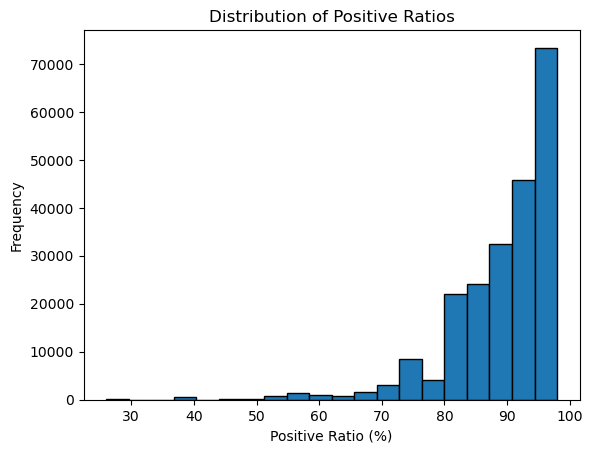

In [39]:
plt.hist(final_dataset['positive_ratio'], bins=20, edgecolor='black')
plt.title('Distribution of Positive Ratios')
plt.xlabel('Positive Ratio (%)')
plt.ylabel('Frequency')
plt.show()

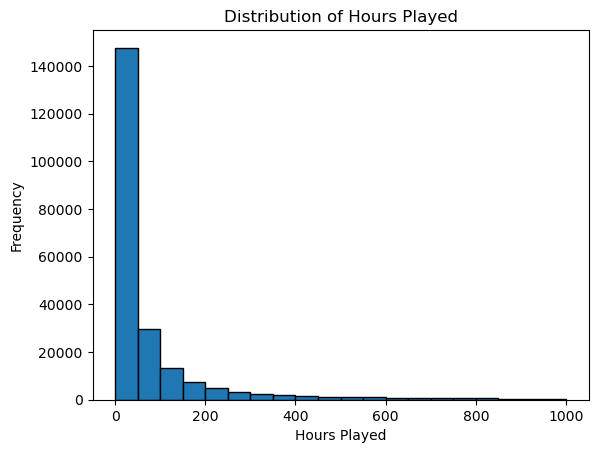

In [40]:
plt.hist(final_dataset['hours'], bins=20, edgecolor='black')
plt.title('Distribution of Hours Played')
plt.xlabel('Hours Played')
plt.ylabel('Frequency')
plt.show()

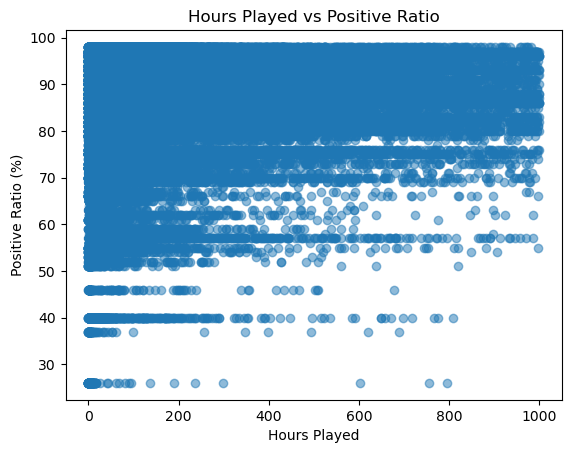

In [41]:
plt.scatter(final_dataset['hours'], final_dataset['positive_ratio'], alpha=0.5)
plt.title('Hours Played vs Positive Ratio')
plt.xlabel('Hours Played')
plt.ylabel('Positive Ratio (%)')
plt.show()

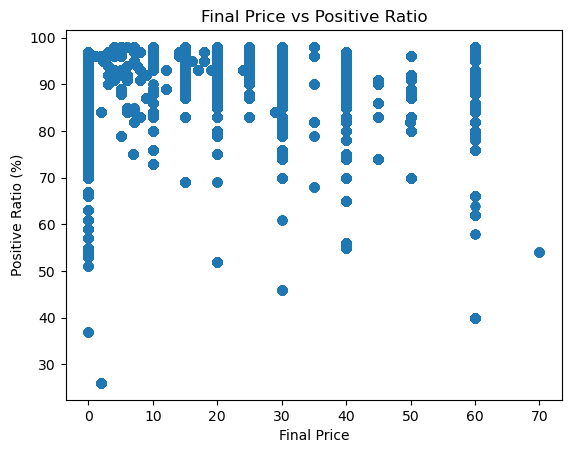

In [42]:
plt.scatter(final_dataset['price_final'], final_dataset['positive_ratio'], alpha=0.5)
plt.title('Final Price vs Positive Ratio')
plt.xlabel('Final Price')
plt.ylabel('Positive Ratio (%)')
plt.show()